End to End Machine Learning Housing Price Prediction Project

Objective: Price prediction and to find out what are the features that influence house prices. to find out which algorithm gives best performance on our dataset

#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
samplesub_df=pd.read_csv("sample_submission.csv")

#dataset observation

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
object_datatype_atr=train_df.select_dtypes(include="object")

In [6]:
object_datatype_atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Visual exploration of numerical features to get overall insight of the data

In [8]:
import matplotlib.pyplot as plt

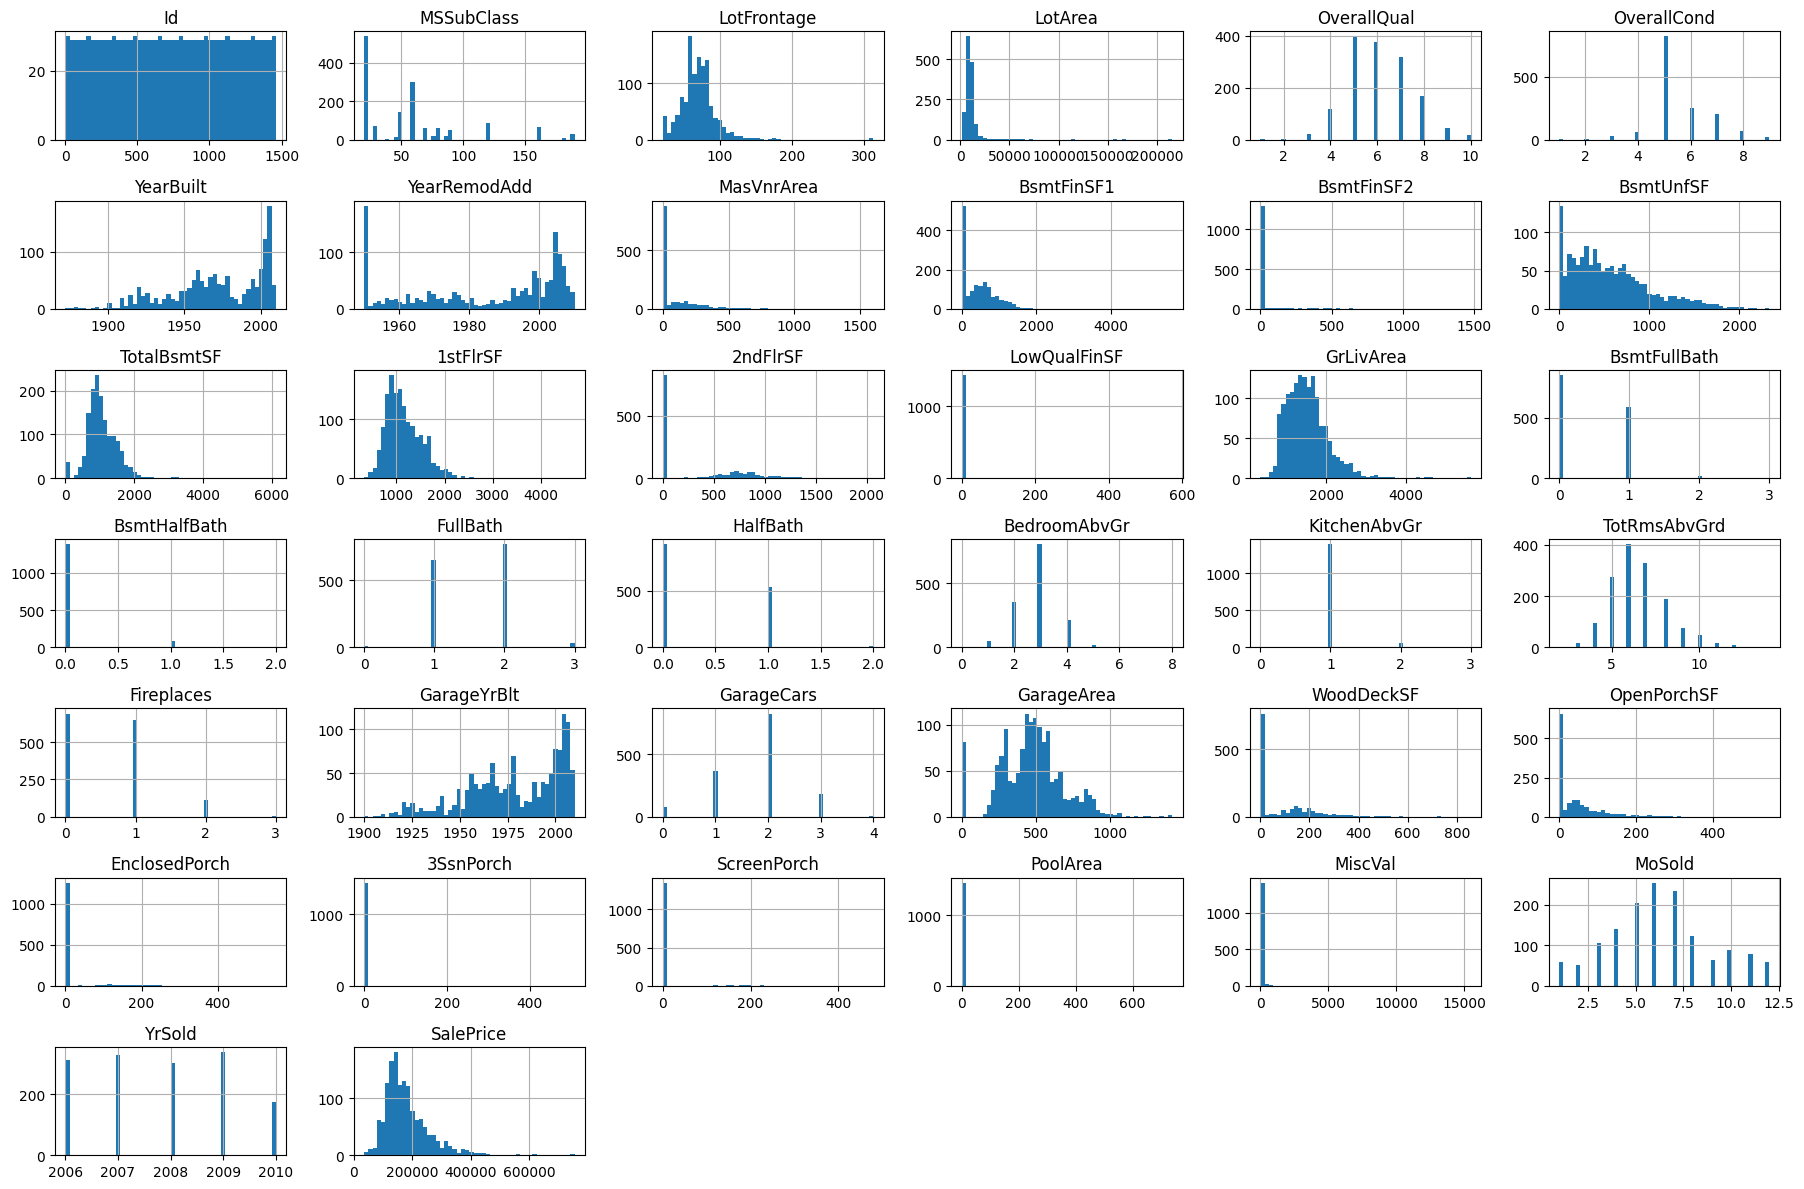

In [9]:
train_df.hist(bins=50,figsize=(18,12))
plt.tight_layout()
plt.show()

#some features having skewed distribution, they might affect the result

#EDA

#exploration of numerical features

In [10]:
num_datatype_atr=train_df.select_dtypes(include=["int64","float64"])

In [11]:
num_datatype_atr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [12]:
num_datatype_atr.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#correlation of numerical features

<Axes: >

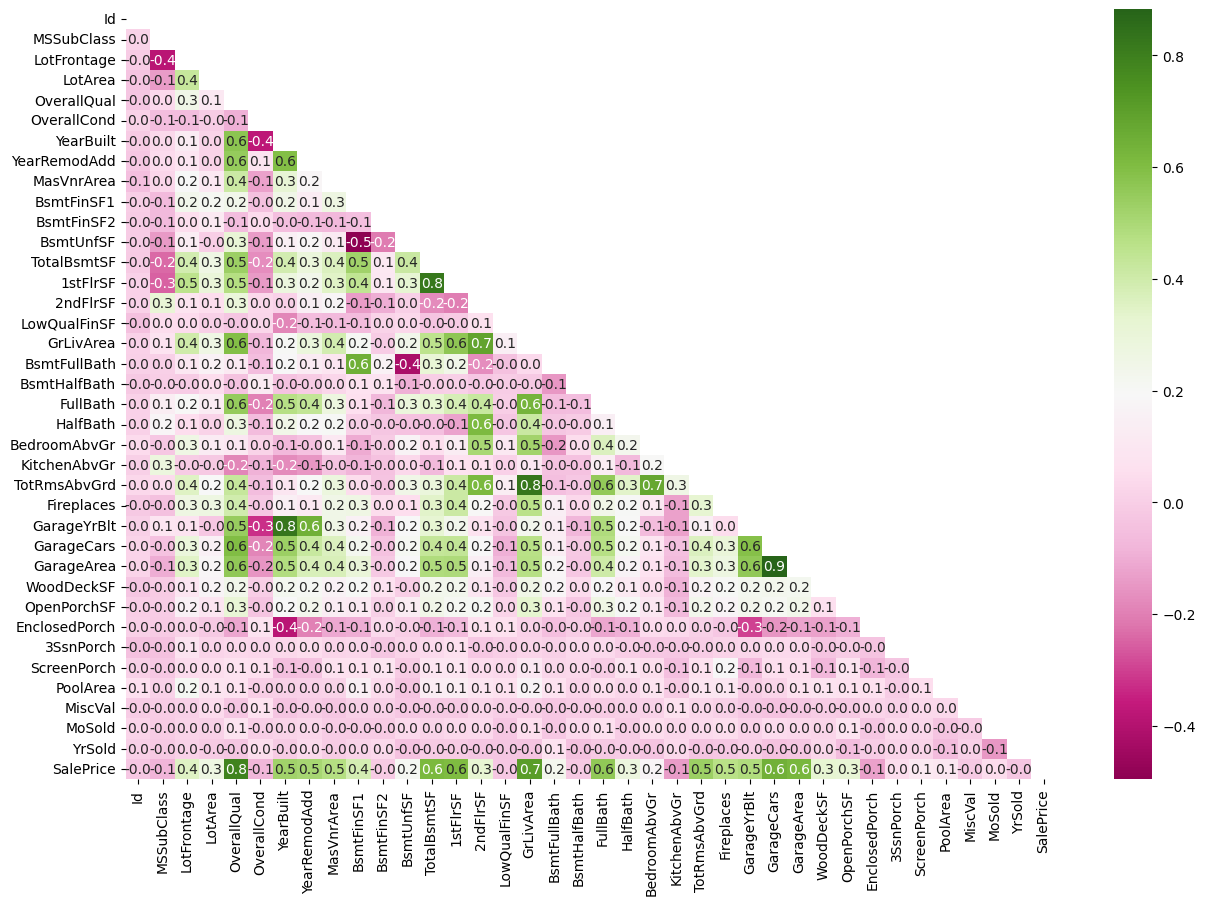

In [13]:
plt.figure(figsize=(15,10))
correlation_matrix=num_datatype_atr.corr()
mask=np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask,
           annot=True, cbar=True,
           cmap="PiYG", fmt=".1f")

In [14]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
samplesub_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


#scatter matrix of important features based on observed correlation matrix

In [16]:
imp_features=["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GrLivArea",
               "FullBath", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea"]

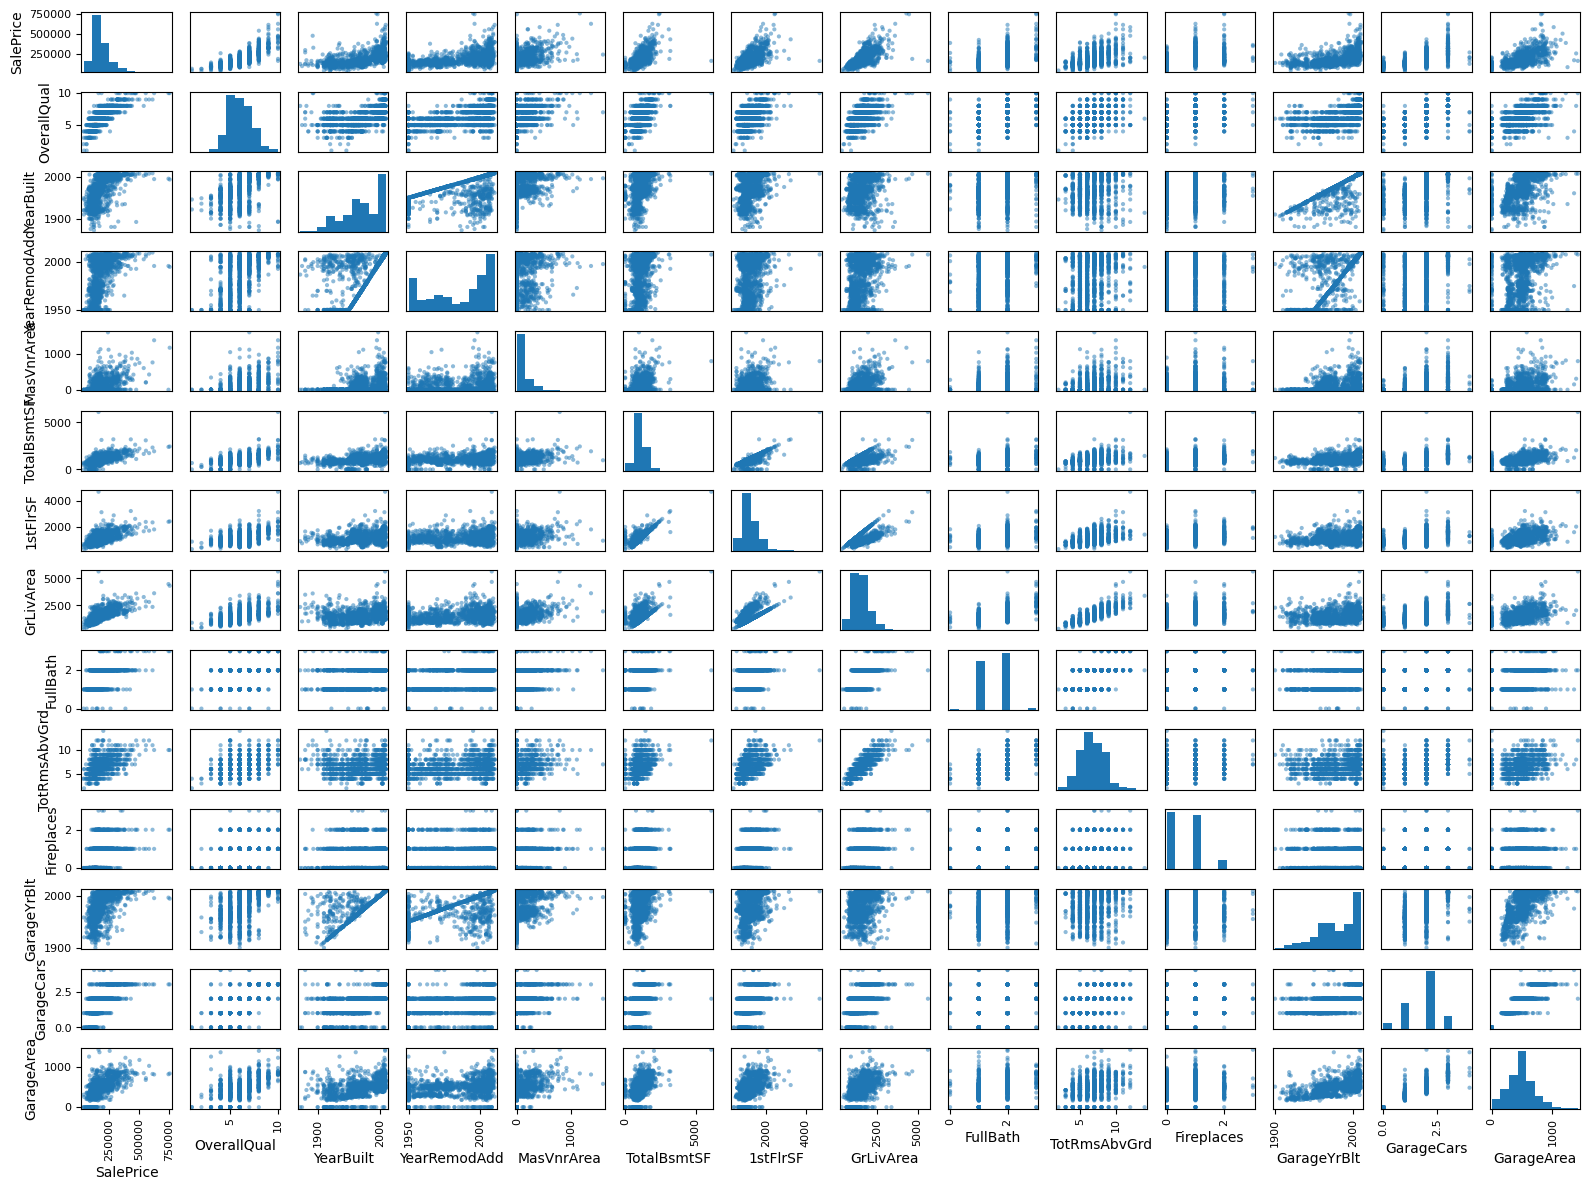

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df[imp_features], figsize=(16,12))

plt.tight_layout()
plt.show()

#for good performance of future model on unseen dataset we will need a validation set.

#feature engineering

In [18]:
X=train_df.drop(labels="SalePrice",axis=1)
y=train_df.SalePrice

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

#getting rid of null values as ml model wont allow missing values. 
we will use function fillings with median to get rid of null values.

In [20]:
from sklearn.impute import SimpleImputer
def missing_numerical(X_train):
    imputer=SimpleImputer(strategy="median")
    
    X_num=X_train.select_dtypes(include=["int64","float64"])
    imputer.fit(X_num)
    
    X=imputer.transform(X_num)
    train_X=pd.DataFrame(X,columns=X_num.columns)
    return train_X

train_X=missing_numerical(X_train)
val_X=missing_numerical(X_val)

#clearing missing values of categorical variables

In [21]:
object_datatype_atr.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#fixing categorical features also, although only numerical features will be used in this model.

In [22]:
from sklearn.preprocessing import OneHotEncoder
obj_encoder=OneHotEncoder()
housing_onehot=obj_encoder.fit_transform(object_datatype_atr)
housing_onehot

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

#training model and generating result

In [23]:
imp_features.remove("SalePrice")
train_X_imp=train_X[imp_features]
val_X_imp=val_X[imp_features]

In [24]:
dict_mse={}

In [25]:
from sklearn.metrics import mean_squared_error
def model_application(model, model_name, train_X, y_train, val_X, y_val):
    model.fit(train_X,y_train)
    pred=model.predict(val_X)
    mse=mean_squared_error(y_val,pred)
    dict_mse[model_name]=np.sqrt(mse)
    return model

from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model=model_application(lr_model, "Linear Regression", train_X,y_train,val_X,y_val)
lr_model_imp=LinearRegression()
lr_model_imp=model_application(lr_model_imp, "Linear Regression for important features", train_X_imp,y_train,val_X_imp,y_val)

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg=model_application(tree_reg, "Decision Tree Regressor", train_X,y_train,val_X,y_val)
tree_reg_imp=DecisionTreeRegressor()
tree_reg_imp=model_application(tree_reg_imp, "Decision Tree Regressor for important features", train_X_imp, y_train, val_X_imp,y_val)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg=model_application(rf_reg, "Random Forest", train_X,y_train,val_X,y_val)
rf_reg_imp=RandomForestRegressor()
rf_reg_imp=model_application(rf_reg_imp, "Random Forest Regressor for important features", train_X_imp, y_train, val_X_imp, y_val)

In [28]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor()
xgb_reg=model_application(xgb_reg, "XGBoost Regressor", train_X, y_train, val_X, y_val)
xgb_reg_imp=XGBRegressor()
xgb_reg_imp=model_application(xgb_reg_imp, "XGBoost Regressor for important features", train_X_imp, y_train, val_X_imp, y_val)

In [29]:
dict_mse

{'Linear Regression': 29107.036038848353,
 'Linear Regression for important features': 30825.678461591866,
 'Decision Tree Regressor': 35125.8927574841,
 'Decision Tree Regressor for important features': 38231.718145624036,
 'Random Forest': 23626.309011520498,
 'Random Forest Regressor for important features': 26712.89727236743,
 'XGBoost Regressor': 25124.566341521975,
 'XGBoost Regressor for important features': 28948.584665086782}

#random forest gives best output here

#evaluation of best performing model by cross validation

In [30]:
def display_scores(scores):
    print("individual error scores:", scores)
    print("mean error:", scores.mean())
    print("standard deviation:", scores.std())
    
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf_reg, train_X,y_train, scoring="neg_mean_squared_error", cv=10)
cv_rmse_scores=np.sqrt(-scores)
display_scores(cv_rmse_scores)

individual error scores: [26395.81651964 25763.24908713 31111.16511824 23747.63469336
 27024.324526   43113.51396723 41778.29796817 23459.91684903
 25674.31114186 35353.81709397]
mean error: 30342.204696462413
standard deviation: 6926.692872357138


#it seems like model is overfitting because even though it scored better compared to other models, but still score is not good when we compare it to training set.

#using GridSearch for tuning hyperparameter

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {"n_estimators":[3,10,30,40,50],
    "max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]}]
grid_search=GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_X, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=50)

In [33]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 50}

In [34]:
cv_result=grid_search.cv_results_
for mean_square, params in zip(cv_result["mean_test_score"],cv_result["params"]):
    print(np.sqrt(-mean_square), params)

42043.53541366975 {'max_features': 2, 'n_estimators': 3}
35651.92754529651 {'max_features': 2, 'n_estimators': 10}
34698.22081826676 {'max_features': 2, 'n_estimators': 30}
32949.745802597135 {'max_features': 2, 'n_estimators': 40}
33656.65298874168 {'max_features': 2, 'n_estimators': 50}
38995.18725792925 {'max_features': 4, 'n_estimators': 3}
34112.32061597911 {'max_features': 4, 'n_estimators': 10}
32618.523517131525 {'max_features': 4, 'n_estimators': 30}
30989.908257413612 {'max_features': 4, 'n_estimators': 40}
31798.098231710814 {'max_features': 4, 'n_estimators': 50}
41825.37740417719 {'max_features': 6, 'n_estimators': 3}
30961.49755123375 {'max_features': 6, 'n_estimators': 10}
31960.69710296732 {'max_features': 6, 'n_estimators': 30}
31657.166951134623 {'max_features': 6, 'n_estimators': 40}
30751.618083761652 {'max_features': 6, 'n_estimators': 50}
38305.61652815797 {'max_features': 8, 'n_estimators': 3}
32310.227040497764 {'max_features': 8, 'n_estimators': 10}
30871.09356

#generating results

In [35]:
test_X=missing_numerical(test_df)
test_X_imp=test_X[imp_features]
my_result=rf_reg.predict(test_X)

In [36]:
my_result

array([127857.66, 159880.5 , 186048.22, ..., 161328.37, 109021.  ,
       238009.52])

In [37]:
rf_reg.score(val_X,y_val)

0.9059914352374231

In [38]:
samplesub_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


#inputting predicted results into sample dataset as a part of "Model Deployment"

In [39]:
samplesub_df["SalePrice"]=my_result

In [40]:
samplesub_df

,Id,SalePrice
0,1461,127857.66
1,1462,159880.50
2,1463,186048.22
3,1464,183752.17
4,1465,196882.74
...,...,...
1454,2915,86307.33
1455,2916,89068.00
1456,2917,161328.37
1457,2918,109021.00


In [41]:
#converting sample data set into new csv file

In [42]:
samplesub_df.to_csv("samplesub.csv",index=False)

In [43]:
#loading updated sampleset

In [44]:
ss=pd.read_csv("samplesub.csv")

In [45]:
ss

,Id,SalePrice
0,1461,127857.66
1,1462,159880.50
2,1463,186048.22
3,1464,183752.17
4,1465,196882.74
...,...,...
1454,2915,86307.33
1455,2916,89068.00
1456,2917,161328.37
1457,2918,109021.00


Conclusion

In [ ]:
#out of a set of few algorithms, random forest regressor scored better, and on cv set it showed overfitting
#lateron through hyperparameter tuning using GridSearchCV the model was optimized and it predicted house prices efficiently on test dataset with no y variable.
#lastly we concatnated the predicted results in our sampleset